In [1]:
import numpy as np
import cv2

img = cv2.imread('data/18-40-02-02 (SLA).jpg')
label = cv2.imread('data/18-40-02-02 (SLA)_re_image.png')

img.shape, label.shape

((1200, 1600, 3), (1200, 1600, 3))

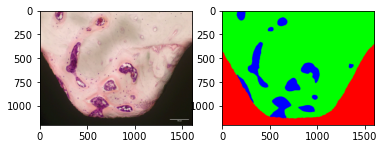

In [2]:
import matplotlib.pyplot as plt

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(label)

In [3]:
import random

def translation(img, mask, x_range, y_range):
    """
    args :
        img = input image
        mask = image's label
        x_range = x축 방향의 이동 범위
        y_range = y축 방향의 이동 범위
    returns :
        ret_img = 변환 된 image
        ret_mask = 변환 된 label
    """
    if img.shape[:2] != mask.shape[:2]: # image 와 mask의 rows, cols의 크기는 같아야함.
        print(f"Image and mask's shape[:2] must be equal. Your image.shape[:2] = {img.shape[:2]}, and mask.shape = {mask.shape[:2]}")
        return None
    # rows, cols 을 구함
    if img.ndim == 2:
        rows, cols = img.shape
    elif img.ndim == 3:
        rows, cols, channels = img.shape
    else:
        print(f"Image's ndim must be 2 or 3. Your input image's ndim is {img.ndim}")
        return None
    # image와 mask의 channel이 다를 경우 (ex: image는 3채널 rgb인데 mask는 grayscale일 경우)
    if img.shape != mask.shape:
        if img.ndim == 2:
            img = img.reshape((img.shape[0], img.shape[1], 1))
        elif mask.ndim == 2:
            mask = mask.reshape((mask.shape[0], mask.shape[1], 1))
        else:
            print(f'Hmm? img.shape = {img.shape}, mask.shape = {mask.shape}')
            return None

    temp = np.concatenate((img, mask), axis=-1) # img와 mask를 합친 후 한 번에 수행
    x = random.randint(-x_range, x_range) # 지정한 범위 내 random한 값
    y = random.randint(-y_range, y_range) # 지정한 범위 내 random한 값

    # translation matrix
    M = np.float32([[1,0,x],
                    [0,1,y]])
    ret = cv2.warpAffine(temp, M, (cols, rows)) # translation
    ret_img = ret[:,:,:channels] # 변환된 img
    ret_mask = ret[:,:,channels:] # 변환된 mask
    return ret_img, ret_mask

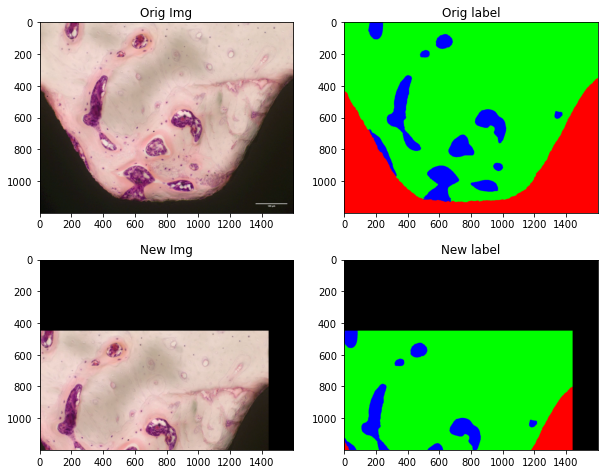

In [4]:
new_img, new_label = translation(img, label, 500, 500)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Orig Img')
plt.subplot(2,2,2)
plt.imshow(label)
plt.title('Orig label')
plt.subplot(2,2,3)
plt.imshow(new_img)
plt.title('New Img')
plt.subplot(2,2,4)
plt.imshow(new_label)
plt.title('New label')
plt.show()

In [10]:
def rotaion(img, mask, degree, center = 0):
    """
    args :
        img = input image
        mask = image's label
        degree = 회전 시킬 각도 범위 (degree, not radian)
        [center] = 회전 시킬 중심 (default = 0 (이미지의 중앙))
    returns :
        ret_img = 변환 된 image
        ret_mask = 변환 된 label
    """
    if img.shape[:2] != mask.shape[:2]: # image 와 mask의 rows, cols의 크기는 같아야함.
        print(f"Image and mask's shape[:2] must be equal. Your image.shape[:2] = {img.shape[:2]}, and mask.shape = {mask.shape[:2]}")
        return None
    # rows, cols 을 구함
    if img.ndim == 2:
        rows, cols = img.shape
    elif img.ndim == 3:
        rows, cols, channels = img.shape
    else:
        print(f"Image's ndim must be 2 or 3. Your input image's ndim is {img.ndim}")
        return None
    # image와 mask의 channel이 다를 경우 (ex: image는 3채널 rgb인데 mask는 grayscale일 경우)
    if img.shape != mask.shape:
        if img.ndim == 2:
            img = img.reshape((img.shape[0], img.shape[1], 1))
        elif mask.ndim == 2:
            mask = mask.reshape((mask.shape[0], mask.shape[1], 1))
        else:
            print(f'Hmm? img.shape = {img.shape}, mask.shape = {mask.shape}')
            return None

    temp = np.concatenate((img, mask), axis=-1) # img와 mask를 합친 후 한 번에 수행

    if center != 0: # 회전 중심 위치
        center_x = random.randint(-center, center)
        center_y = random.randint(-center, center)
    else:
        center_x = 0
        center_y = 0
    M = cv2.getRotationMatrix2D((cols/2 + center_x, rows/2 + center_y), degree, 1) # rotaion matrix

    ret = cv2.warpAffine(temp, M, (cols, rows)) # rotaion
    ret_img = ret[:,:,:channels] # 변환된 img
    ret_mask = ret[:,:,channels:] # 변환된 mask
    return ret_img, ret_mask

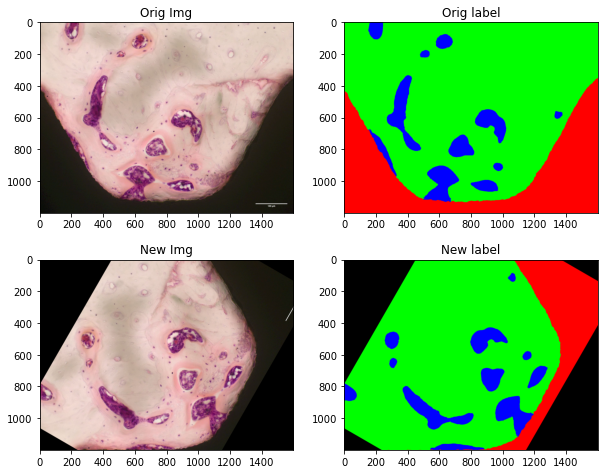

In [11]:
new_img, new_label = rotaion(img, label, 60)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Orig Img')
plt.subplot(2,2,2)
plt.imshow(label)
plt.title('Orig label')
plt.subplot(2,2,3)
plt.imshow(new_img)
plt.title('New Img')
plt.subplot(2,2,4)
plt.imshow(new_label)
plt.title('New label')
plt.show()

img와 mask 비교랑 합치는 건 개별 기능 함수에서 말고 run 함수에서 하면 될 듯  
남는 부분 padding 줄 건지 옵션도 있으면 좋겠다.(채우는 기능)